In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cyberattack = pd.read_csv('/content/cybersecurity_attacks.csv')

In [ ]:
cyberattack.shape

(40000, 25)

In [ ]:
cyberattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
cyberattack.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


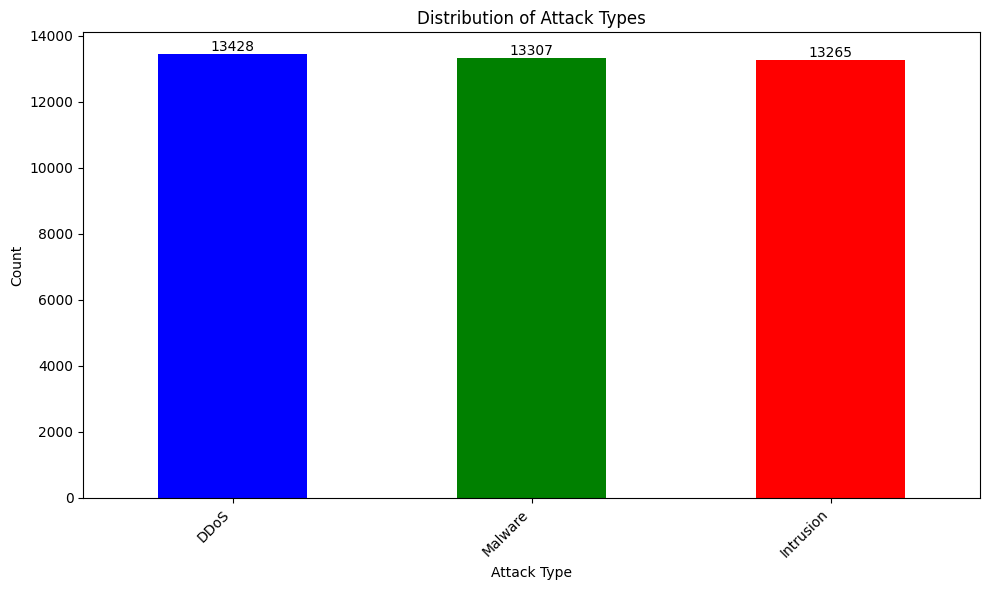

In [ ]:
def attack_type(data):
    # Group the data by 'Attack Type' and count occurrences
    attack_type_counts = data['Attack Type'].value_counts()

    # Define colors for bars
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = attack_type_counts.plot(kind='bar', color=colors)
    plt.title('Distribution of Attack Types')
    plt.xlabel('Attack Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Add count labels on top of each bar
    for i, count in enumerate(attack_type_counts):
        ax.text(i, count + 100, str(count), ha='center', color='black')

    plt.show()

attack_type(cyberattack)

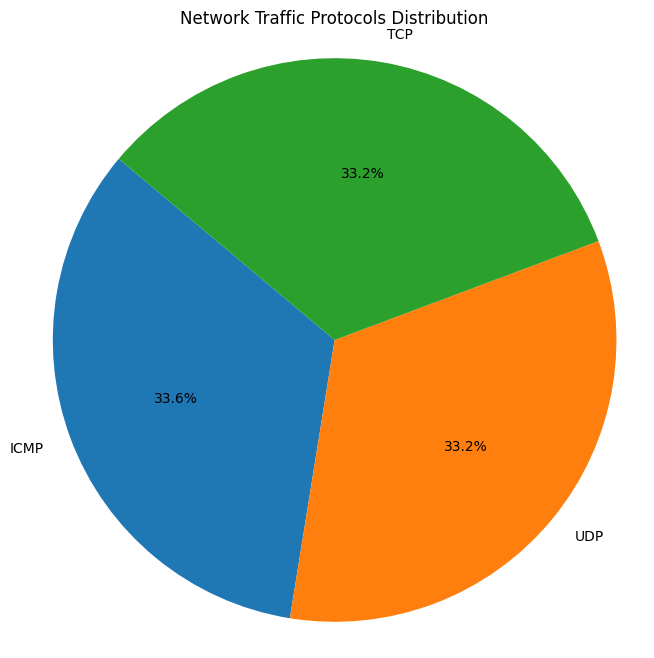

In [ ]:
def protocol(data):

    # Group the data by 'Protocol' and count occurrences
    protocol_counts = data['Protocol'].value_counts()

    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Network Traffic Protocols Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

protocol(cyberattack)

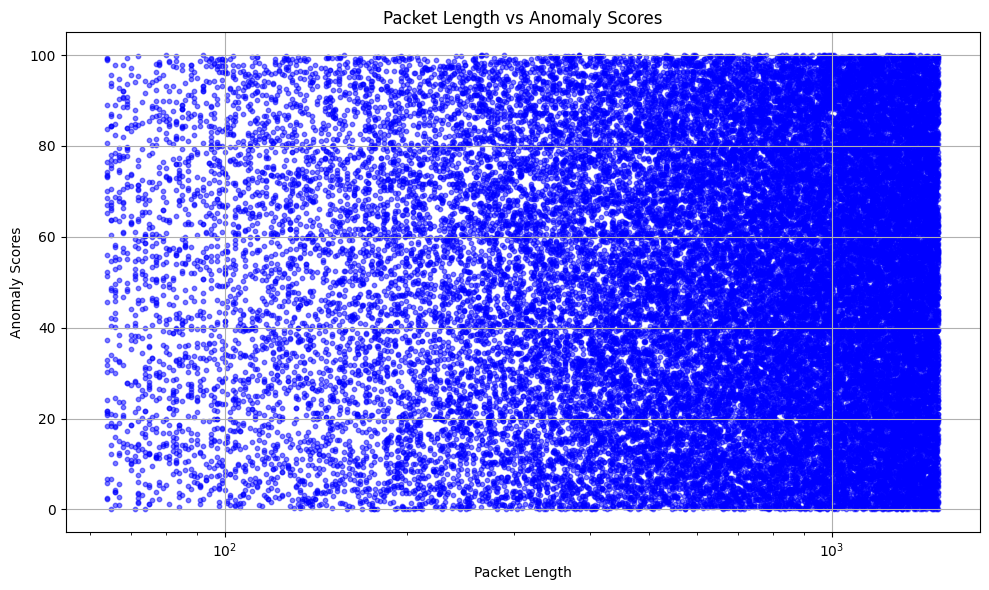

In [ ]:
def packet_length_vs_anomaly_scores(data):

    # Extracting data
    packet_lengths = data['Packet Length']
    anomaly_scores = data['Anomaly Scores']

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(packet_lengths, anomaly_scores, alpha=0.5, s=10, c='blue')
    plt.title('Packet Length vs Anomaly Scores')
    plt.xlabel('Packet Length')
    plt.ylabel('Anomaly Scores')
    plt.xscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


packet_length_vs_anomaly_scores(cyberattack)

<ipython-input-9-af1d5b3554fa>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


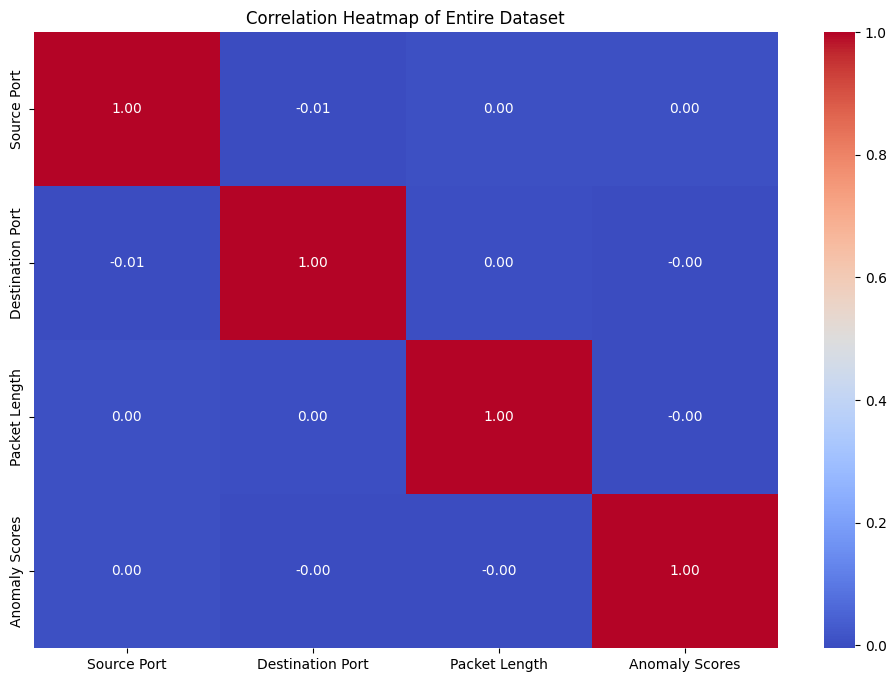

In [ ]:
def correlation_heatmap(data):

    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Entire Dataset')
    plt.show()


correlation_heatmap(cyberattack)

<ipython-input-10-8dc0f9299330>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Severity Level', data=data, palette='viridis')


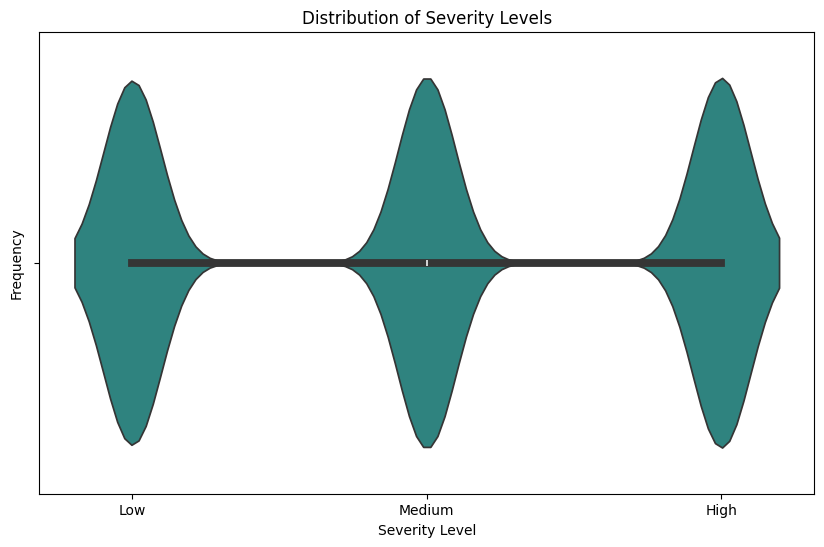

In [ ]:
def severity(data):
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Severity Level', data=data, palette='viridis')
    plt.title('Distribution of Severity Levels')
    plt.xlabel('Severity Level')
    plt.ylabel('Frequency')
    plt.show()

severity(cyberattack)